In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Load in all 2002 NME A class Securities
df = pd.read_csv('November2018sample_newUSE_NME2002.csv')

In [3]:
df

,PID,Issuer,Class,norm_class,Name,Current_Balance,Zero-Balance Payment Period Number,Sum Principle Paid,MTG ORIG AMT,Maturity,...,Bloomberg Composite,HCLB,MTG INT SHRTFLL,HIST INTRST SHRTFLL min,HIST INTRST SHRTFLL max,HIST INTRST SHRTFLL sum,Label,norm_label,Felabel,USE
0,FC_1005,FI_308,A1,A,CWALT 2002-2 A1,0.0000,1,1.5000,1.5000,4/25/2032,...,NR,NaN,0.000000,1.51,5.36,23.10,NMEm,NME,0,0
1,FC_1005,FI_308,A10,A,CWALT 2002-2 A10,1.0000,paying,1.0000,1.0000,4/25/2032,...,NR,NaN,0.000000,239.16,5635.05,18725.03,NMEm,NME,0,0
2,FC_1005,FI_308,A12,A,CWALT 2002-2 A12,0.0000,1,38.5000,38.5000,4/25/2032,...,NR,NaN,0.000000,48.45,653.29,1747.01,NMEm,NME,0,0
3,FC_1005,FI_308,A14,A,CWALT 2002-2 A14,0.0000,1,0.5000,0.5000,4/25/2032,...,NR,NaN,0.000000,1.07,8.48,18.56,NMEm,NME,0,0
4,FC_1005,FI_308,A2,A,CWALT 2002-2 A2,0.0000,1,95.6120,95.6120,4/25/2032,...,NR,NaN,0.000000,75.43,285.13,1144.02,NMEm,NME,0,0
5,FC_1005,FI_308,A3,A,CWALT 2002-2 A3,0.0000,1,22.4750,22.4750,4/25/2032,...,NR,NaN,0.000000,11.74,282.49,699.45,NMEm,NME,0,0
6,FC_1005,FI_308,A4,A,CWALT 2002-2 A4,0.0000,1,119.5870,119.5870,4/25/2032,...,NR,NaN,0.000000,3.50,137.21,615.24,NMEm,NME,0,0
7,FC_1005,FI_308,A8,A,CWALT 2002-2 A8,0.0000,1,31.0962,31.0963,4/25/2032,...,NR,NaN,1.750191,1.75,1.75,1.75,NMEm,NME,0,0
8,FC_1005,FI_308,B1,B,CWALT 2002-2 B1,0.0000,1,4.5107,4.5107,4/25/2032,...,NR,NaN,0.000000,5.57,75.37,201.85,NMEm,NME,0,0
9,FC_1005,FI_308,B2,B,CWALT 2002-2 B2,0.0000,1,3.2577,3.2577,4/25/2032,...,NR,NaN,0.000000,4.03,54.44,145.81,NMEm,NME,0,0


In [8]:
# Make function to bin the shortfall values
# Bins: 0-1000, 1000-10000, 10000-100000, 100000-500000, 500000-1000000, 1000000-10000000, 10000000+

shortfall = 'HIST INTRST SHRTFLL sum'

def f(row):
    # Positive bins
    if row[shortfall] >=0 and row[shortfall] < 1000:
        bn = '0 : 1,000'
    elif row[shortfall] >=1000 and row[shortfall] < 10000:
        bn = '1,000 : 10,000'
    elif row[shortfall] >=10000 and row[shortfall] < 100000:
        bn = '10,000 : 100,000'
    elif row[shortfall] >=100000 and row[shortfall] < 500000:
        bn = '100,000 : 500,000'
    elif row[shortfall] >=500000 and row[shortfall] < 1000000:
        bn = '500,000 : 1,000,000'
    elif row[shortfall] >=1000000 and row[shortfall] < 10000000:
        bn = '1,000,000 : 10,000,000'
    elif row[shortfall] >=10000000:
        bn = '10,000,000+'
    
    # Negative bins
    elif row[shortfall] >= -1000 and row[shortfall] < 0:
        bn = '0 : -1,000'
    elif row[shortfall] >= -10000 and row[shortfall] < -1000:
        bn = '-1,000 : -10,000'
    elif row[shortfall] >= -100000 and row[shortfall] < -10000:
        bn = '-10,000 : -100,000'
    elif row[shortfall] >= -500000 and row[shortfall] < -100000:
        bn = '-100,000 : -500,000'
    elif row[shortfall] >= -1000000 and row[shortfall] < -500000:
        bn = '-500,000 : -1,000,000'
    elif row[shortfall] >= -10000000 and row[shortfall] < -1000000:
        bn = '-1,000,000 : -10,000,000'
    elif row[shortfall] < 10000000:
        bn = '-10,000,000+'
        
    else:
        bn = 'NaN'

    return bn

df[shortfall + ' bin'] = df.apply(f, axis=1)

shortfall = 'MTG INT SHRTFLL'
df[shortfall + ' bin'] = df.apply(f, axis=1)

shortfall = 'HCLB'
df[shortfall + ' bin'] = df.apply(f, axis=1)

In [7]:
# Count number of each bin for HIST INTRST SHRTFLL
df['HIST INTRST SHRTFLL sum bin'].value_counts()

0 : 1,000                 905
1,000 : 10,000            357
10,000 : 100,000          187
100,000 : 500,000          25
500,000 : 1,000,000         4
1,000,000 : 10,000,000      2
Name: HIST INTRST SHRTFLL sum bin, dtype: int64

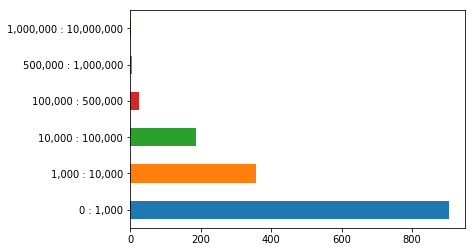

In [14]:
# Frequency chart for HIST INTRST SHRTFLL
df['HIST INTRST SHRTFLL sum bin'].value_counts().plot(kind='barh')

In [15]:
# Count number of each bin for MTG INT SHRTFLL
df['MTG INT SHRTFLL bin'].value_counts()

0 : 1,000           1413
NaN                   36
1,000 : 10,000        27
10,000 : 100,000       4
Name: MTG INT SHRTFLL bin, dtype: int64

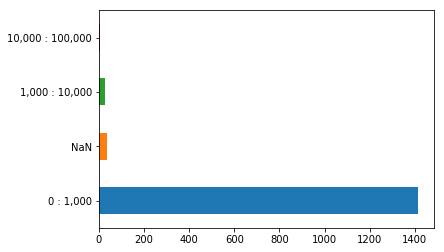

In [16]:
# Frequency chart for MTG INT SHRTFLL
df['MTG INT SHRTFLL bin'].value_counts().plot(kind='barh')

In [17]:
# Frequency chart for HCLB
df['HCLB bin'].value_counts()

NaN          1386
0 : 1,000      94
Name: HCLB bin, dtype: int64

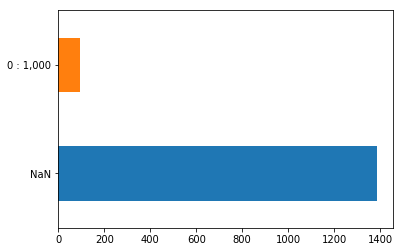

In [18]:
# Frequency chart for HCLB
df['HCLB bin'].value_counts().plot(kind='barh')